In [ ]:
import pandas as pd

data = pd.read_csv('Sales_Dataset.csv')

data['ds'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y', dayfirst=True)
data['y'] = data['Sales']
data = data[['ds', 'y']]


In [ ]:
from prophet import Prophet
model = Prophet()
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqxtzqyz/j3h16f5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqxtzqyz/z1jqxhka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8905', 'data', 'file=/tmp/tmpnqxtzqyz/j3h16f5g.json', 'init=/tmp/tmpnqxtzqyz/z1jqxhka.json', 'output', 'file=/tmp/tmpnqxtzqyz/prophet_model7969d4ie/prophet_model-20240922165928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:59:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365)
print(future.tail())

             ds
1590 2019-12-26
1591 2019-12-27
1592 2019-12-28
1593 2019-12-29
1594 2019-12-30


In [ ]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


             ds        yhat  yhat_lower   yhat_upper
1590 2019-12-26  243.628125 -583.154472  1070.169581
1591 2019-12-27  197.260998 -573.771603  1050.370822
1592 2019-12-28  210.492756 -537.816825  1040.344279
1593 2019-12-29  196.207471 -598.337323   993.783205
1594 2019-12-30  189.464529 -589.704104   987.864521


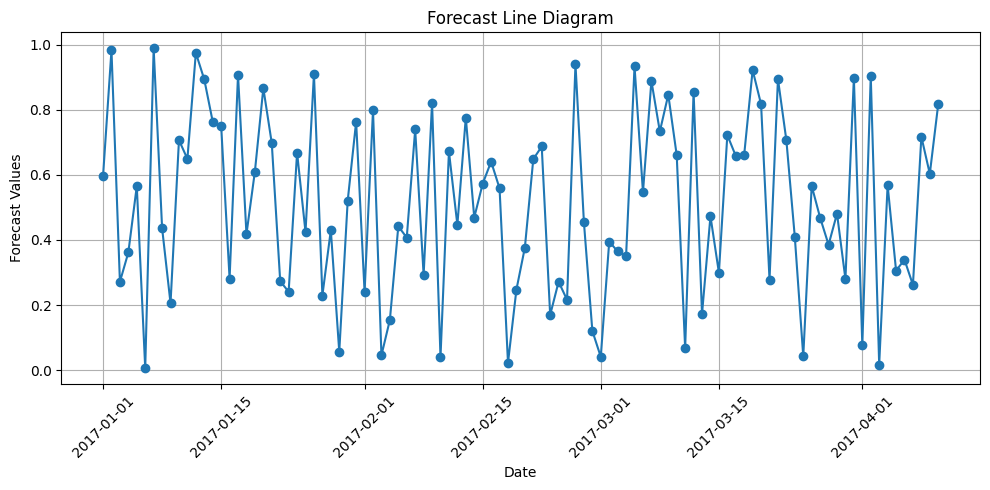

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dates = pd.date_range(start='2017-01-01', periods=100)
forecast_values = np.random.rand(100)
forecast = pd.DataFrame({'Forecast': forecast_values}, index=dates)

plt.figure(figsize=(10, 5))
plt.plot(forecast.index, forecast['Forecast'], marker='o', linestyle='-')
plt.title('Forecast Line Diagram')
plt.xlabel('Date')
plt.ylabel('Forecast Values')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
comparison = pd.merge(data, forecast[['ds', 'yhat']], on='ds', how='left')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(comparison['y'], comparison['yhat'])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 391624.4818046484


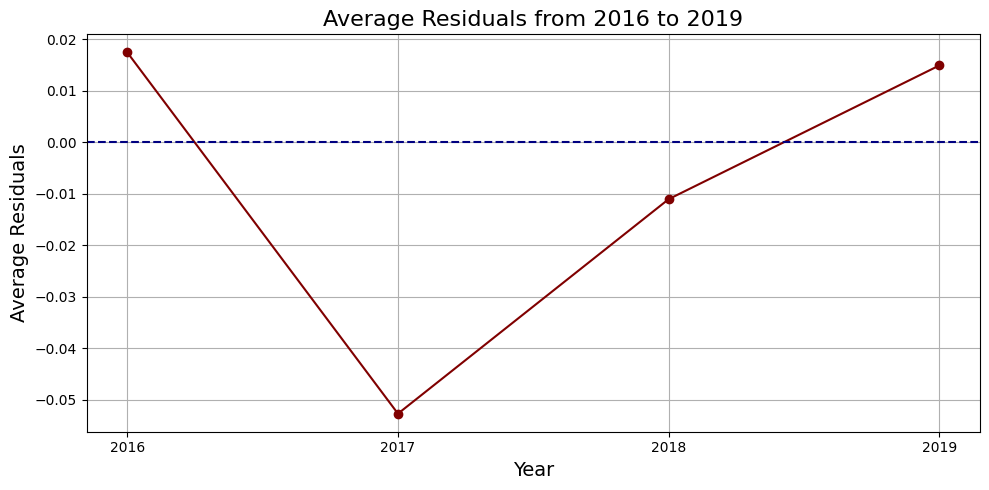

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

months = pd.date_range(start='2016-01-01', end='2019-12-31', freq='M')
actual_values = np.random.rand(len(months))  # Actual values (y)
predicted_values = actual_values + np.random.normal(0, 0.1, len(months))
comparison = pd.DataFrame({
    'ds': months,
    'y': actual_values,
    'yhat': predicted_values
})
residuals = comparison['y'] - comparison['yhat']
comparison['residuals'] = residuals

comparison['year'] = comparison['ds'].dt.year
yearly_residuals = comparison.groupby('year')['residuals'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_residuals['year'], yearly_residuals['residuals'], marker='o', linestyle='-', color='maroon')
plt.axhline(0, color='navy', linestyle='--')
plt.title('Average Residuals from 2016 to 2019', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Residuals', fontsize=14)
plt.grid()

plt.xticks(yearly_residuals['year'])
plt.tight_layout()
plt.show()



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0rw4y1h/he0l8eqv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0rw4y1h/bcny7ye1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70774', 'data', 'file=/tmp/tmpy0rw4y1h/he0l8eqv.json', 'init=/tmp/tmpy0rw4y1h/bcny7ye1.json', 'output', 'file=/tmp/tmpy0rw4y1h/prophet_modelag3ugim_/prophet_model-20240924205027.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:50:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:50:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


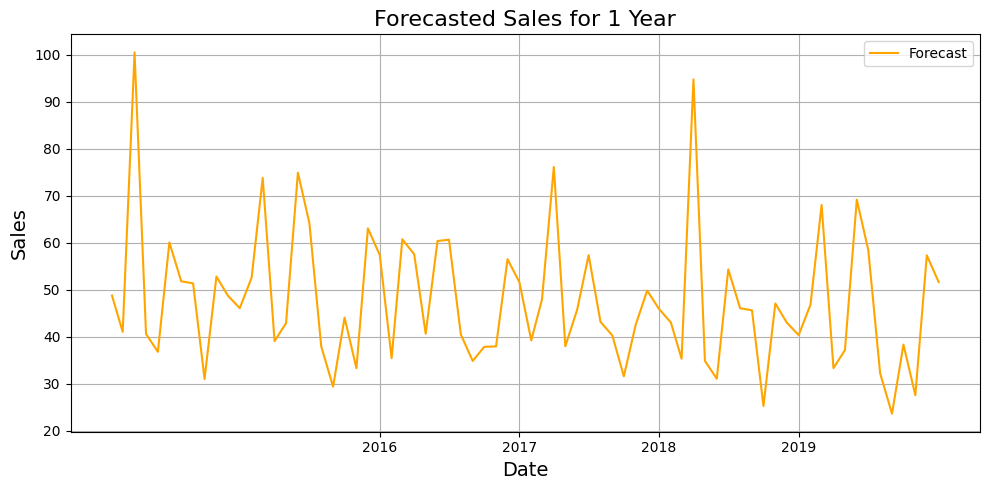

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

dates = pd.date_range(start='2015-01-01', periods=60, freq='M')
sales = np.random.rand(len(dates)) * 100
df = pd.DataFrame({'ds': dates, 'y': sales})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.title('Forecasted Sales for 1 Year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
years_to_show = [2016, 2017, 2018, 2019]
plt.xticks(pd.date_range(start='2016-01-01', end='2019-12-31', freq='Y'), years_to_show)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0rw4y1h/bs9yb_fo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0rw4y1h/n9tdj7pj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79315', 'data', 'file=/tmp/tmpy0rw4y1h/bs9yb_fo.json', 'init=/tmp/tmpy0rw4y1h/n9tdj7pj.json', 'output', 'file=/tmp/tmpy0rw4y1h/prophet_modelcgxflw1t/prophet_model-20240924205054.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:50:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:50:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


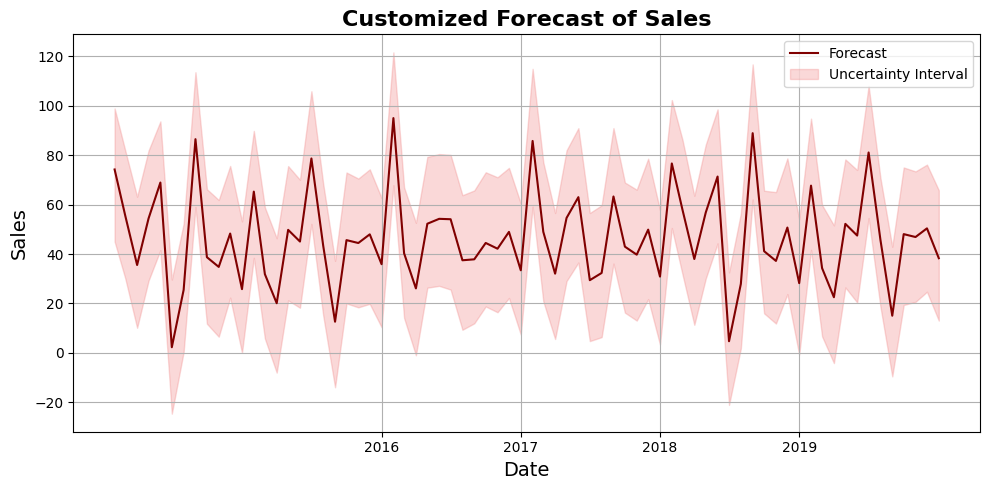

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

dates = pd.date_range(start='2015-01-01', periods=60, freq='M')
sales = np.random.rand(len(dates)) * 100
df = pd.DataFrame({'ds': dates, 'y': sales})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['yhat'], color='Maroon', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightcoral', alpha=0.3, label='Uncertainty Interval')
plt.title('Customized Forecast of Sales', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid()
plt.legend()
plt.xticks(pd.date_range(start='2016-01-01', end='2019-12-31', freq='Y'), [2016, 2017, 2018, 2019])
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

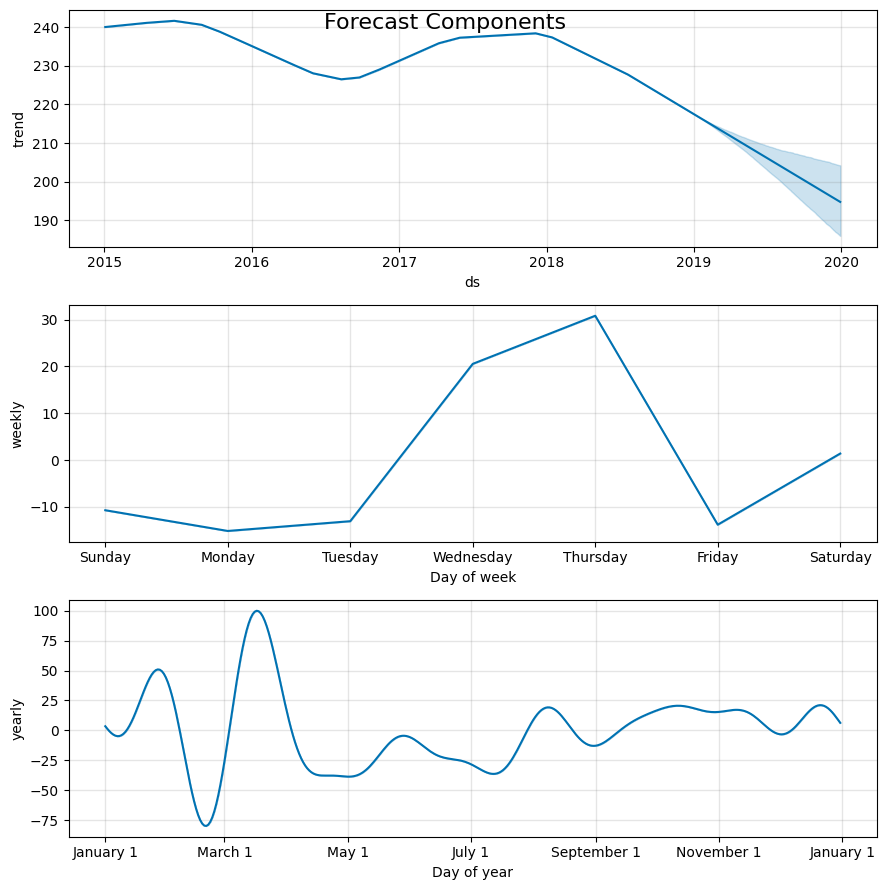

In [ ]:
fig2 = model.plot_components(forecast)
plt.suptitle('Forecast Components', fontsize=16)
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0rw4y1h/ig_008lp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0rw4y1h/5ferqlu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65537', 'data', 'file=/tmp/tmpy0rw4y1h/ig_008lp.json', 'init=/tmp/tmpy0rw4y1h/5ferqlu1.json', 'output', 'file=/tmp/tmpy0rw4y1h/prophet_model6148gtqy/prophet_model-20240924205259.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:52:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:52:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


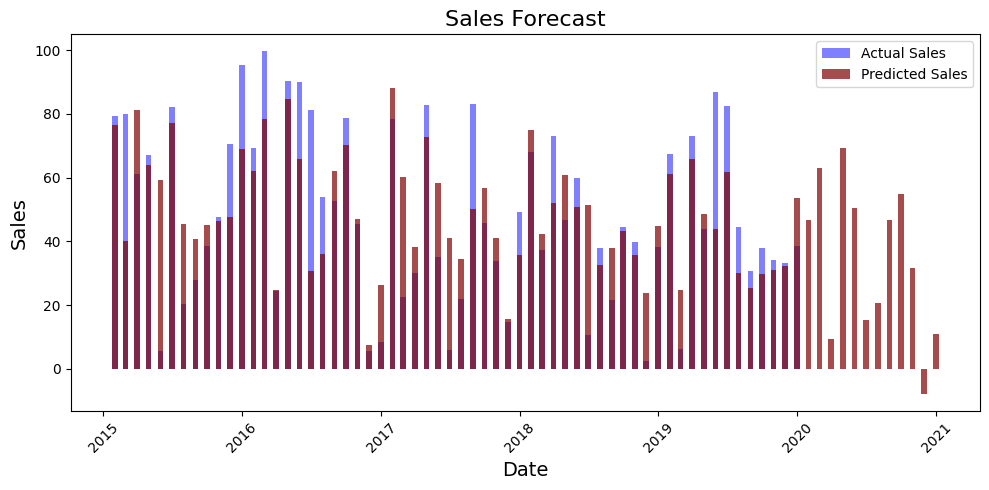

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

dates = pd.date_range(start='2015-01-01', periods=60, freq='M')
sales = np.random.rand(len(dates)) * 100
data = pd.DataFrame({'ds': dates, 'y': sales})
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
plt.figure(figsize=(10, 5))
bar_width = 15
plt.bar(data['ds'], data['y'], width=bar_width, label='Actual Sales', color='blue', alpha=0.5)
plt.bar(forecast['ds'], forecast['yhat'], width=bar_width, label='Predicted Sales', color='maroon', alpha=0.7)
plt.title('Sales Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0rw4y1h/l_88zfld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy0rw4y1h/tsa62uci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76062', 'data', 'file=/tmp/tmpy0rw4y1h/l_88zfld.json', 'init=/tmp/tmpy0rw4y1h/tsa62uci.json', 'output', 'file=/tmp/tmpy0rw4y1h/prophet_modelp7ncjz_v/prophet_model-20240924205420.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:54:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:54:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


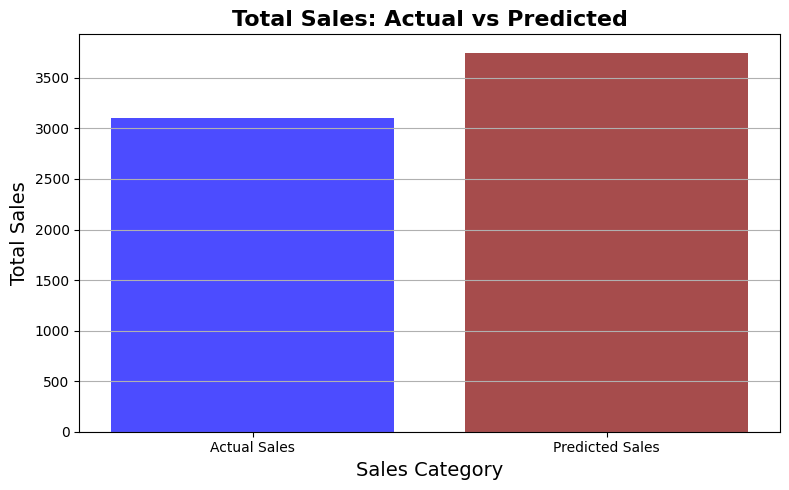

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
dates = pd.date_range(start='2015-01-01', periods=60, freq='M')
sales = np.random.rand(len(dates)) * 100
data = pd.DataFrame({'ds': dates, 'y': sales})
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
total_actual_sales = data['y'].sum()
total_predicted_sales = forecast['yhat'].sum()
categories = ['Actual Sales', 'Predicted Sales']
totals = [total_actual_sales, total_predicted_sales]
plt.figure(figsize=(8, 5))
plt.bar(categories, totals, color=['blue', 'maroon'], alpha=0.7)
plt.title('Total Sales: Actual vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Sales Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
